# **Sentimental analysis - Multinomial Bayes theorem**

In [34]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , recall_score , precision_score

In [47]:
# This CSV file contains characters (like currency symbols, accents, or emojis)
# that are not saved in the standard UTF-8 format that Python expects by default.
# so we use 'latin-1' encoding to read the file

In [46]:
df = pd.read_csv("all-data.csv", encoding='latin-1')
df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [14]:
df.columns

Index(['label', 'text'], dtype='object')

In [ ]:
# To use Multinomial Naive Bayes,
# you cannot feed raw text directly into the model.
# You must convert the text into "features" (numbers)

In [18]:
print(df['label'].unique())
print(df.columns)

['neutral' 'negative' 'positive']
Index(['label', 'text'], dtype='object')


In [21]:
x = df['text']
y = df['label']

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
vectorizer = CountVectorizer(stop_words = 'english')
x_train_scaled = vectorizer.fit_transform(x_train)
x_test_scaled = vectorizer.transform(x_test)

In [25]:
model = MultinomialNB()
model.fit(x_train_scaled,y_train)

MultinomialNB()

In [27]:
y_pred = model.predict(x_test_scaled)

Validation

In [43]:
# Check the order directly from the trained model
print("Model Class Order:", model.classes_)

Model Class Order: ['negative' 'neutral' 'positive']


In [45]:
accuracy = accuracy_score(y_test , y_pred)
cm = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
print(class_report)
print("accuracy:" ,accuracy)

              precision    recall  f1-score   support

    negative       0.63      0.56      0.59       179
     neutral       0.77      0.85      0.81       847
    positive       0.64      0.54      0.58       428

    accuracy                           0.72      1454
   macro avg       0.68      0.65      0.66      1454
weighted avg       0.71      0.72      0.71      1454

accuracy: 0.7214580467675378


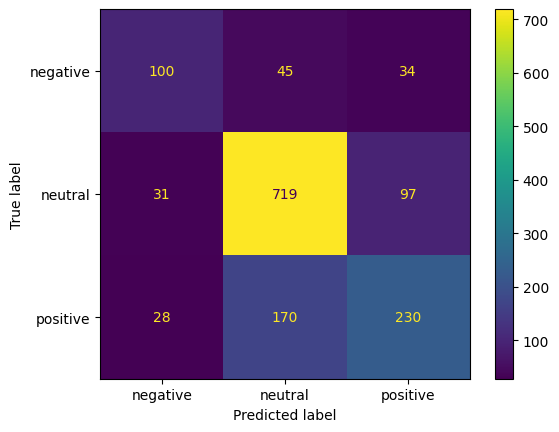

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

graph = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
graph.plot()